## Assignment 1

### arthur: Yao Huang
### netID: yh569

## 1.1

In [ ]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn import linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


In [2]:
## load the dataset
df = pd.read_csv ('Hitters.csv')

In [46]:
# take a look at the data
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [3]:
## access only numeric columns 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
newdf = newdf.dropna(how = 'any')

In [4]:
# use lasso to predict salary
y = newdf.Salary
X = newdf.loc[:, newdf.columns != 'Salary']

# set alphas for the model
alphas = 10**np.linspace(10,-2,200)*0.5

Text(0,0.5,'weights')

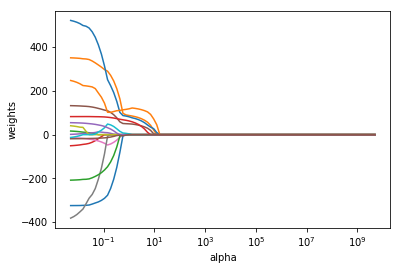

In [48]:
# use lasso model 
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X), y)
    coefs.append(lasso.coef_)
    
# create visualization for the coefficients trajectories
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [51]:
## find the last 3 remaining predictors 
## use for loop in the coefs
for arr in coefs:
    if (arr>0).sum() == 3:
        last_3 = arr
        break

In [52]:
# now take a look at the predictors 
pd.Series(last_3, index=X.columns)

AtBat       0.000000
Hits       11.277273
HmRun       0.000000
Runs        0.000000
RBI         0.000000
Walks       0.000000
Years       0.000000
CAtBat      0.000000
CHits       0.000000
CHmRun      0.000000
CRuns      24.026969
CRBI       63.521549
CWalks      0.000000
PutOuts     0.000000
Assists     0.000000
Errors      0.000000
dtype: float64

In [13]:
indexes = [1,10,11]
preds = list(newdf.columns[indexes])
print('the last 3 remaining predictors are:{}'.format(str(preds)))

the last 3 remaining predictors are:['Hits', 'CRuns', 'CRBI']


In [70]:
## from the above coefs we see the last 3 remaining predictors are of index 1, 10, 11 (starting from 0)
## referring to: 'Hits', 'CRuns', 'CRBI'

In [26]:
# split dataset into training and test set
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [36]:
## cross validation for computing the optimal penalty
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=100000, n_alphas=100, n_jobs=1, normalize=True,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [37]:
print('the optimal alpha in our case is: {}'.format(lassocv.alpha_))

the optimal alpha in our case is: 0.07425688482302709


In [38]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

129668.34395914465

Text(0,0.5,'weights')

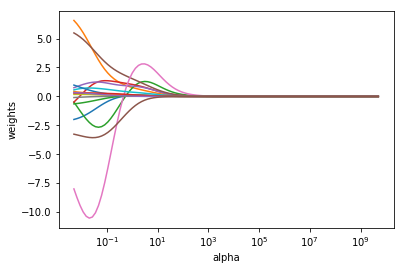

In [53]:
## 1.2 ridge regression
alphas = 10**np.linspace(10,-2,100)*0.5

ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# visualize predictors coefficients trajectories
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [54]:
for arr in coefs:
    if (arr>0).sum() == 3:
        last_3 = arr
        break
        

In [55]:
pd.Series(last_3, index=X.columns)

AtBat       0.000000
Hits       11.277273
HmRun       0.000000
Runs        0.000000
RBI         0.000000
Walks       0.000000
Years       0.000000
CAtBat      0.000000
CHits       0.000000
CHmRun      0.000000
CRuns      24.026969
CRBI       63.521549
CWalks      0.000000
PutOuts     0.000000
Assists     0.000000
Errors      0.000000
dtype: float64

 ### ridge regression got the same 3 remaining predictiors as lasso did.

In [40]:
# cross validation
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
print('optimal alpha in this case is: {}'.format(ridgecv.alpha_))

optimal alpha in this case is: 0.008737642000038414


In [41]:
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(X_train, y_train)
mean_squared_error(y_test, ridge.predict(X_test))

124530.80123623811

# 2 
bias-variance tradeoff: models could be either overfitting or underfitting. In statistical problems, 
models with low bias tend to be more flexible, and tend to have high variance;
vice versa, models with low variance tend to be less flexible, and tend to have high bias.

By using regularization methods like ridge and lasso, we are adding penalty terms to the model. They are shrinkage models.
They tend to achieve a lower variance by sacrificing some bias.

In our case, for example, by shrinking the coefficients, we are adding bias to the model. In lasso, we might achieve optimal 
models that has some coefficients equal to 0. By doing this, we want to achieve lower variance.

This way, regularization could improve a lot in overfitting.